# Taller Machine Learning 01 - Analítica de Datos

#### Pontificia Universidad Javeriana, Ingeniería de Sistemas
#### David Santiago Barreto Mora
#### 23/10/2023 (dd/mm/yyyy)

#### *Objetivo:* Comparación de métricas de rendimiento entre diferentes modelos de clasificación.
---

# Aplicación de algoritmos de machine learning
- Clasificador Random Forest
- Clasificador de descenso de gradiente estocástico (SGD)
- Clasificador de soport vectorial

Se usará validación cruzada como técnica de evaluación para los modelos propuestos e implementados:

- Grid Search CV
- Punctuation CV

**Objetivo:** Comparar los diferentes modelos de ML para la calidad del vino. La idea principal es jugar con clasificación binaria.

## Primera Parte. Preprocesamiento de datos.
El dataset sobre el cual trabajaremos trata sobre la calidad de muestras de vino. Para analizarlo, primero importamos las librerías necesarias y también la fuente de datos.

In [1]:
# 1.a Importación de librerías necesarias para el desarrollo del taller
# Métodos matemáticos y manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos y gráficos
import matplotlib.pyplot as plt # Visualización de datos
import seaborn as sns   # Graficos estadísticos

from sklearn.preprocessing import StandardScaler, LabelEncoder #Normalización de datos y codificación de variables categóricas

### Carga de datos

In [2]:
# Url con los datos
url = "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/main/Varios/winequality-red.csv"

# Creación del dataframe con la url
wineDF = pd.read_csv(url, sep=";")

# Inspección visual del dataframe
wineDF.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Ahora se presenta información general de los datos.

In [3]:
# Nombres de las columnas
wineDF.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
# Columnas y sus tipos de datos
wineDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Observaciones
El dataset presenta información sobre calidad de vino con respecto a diferentes atributos del mismo. Son 1599 registros en total, de los cuales, no hay ni un solo dato nulo o faltante en alguna de las columnas. Esto probablemente indica que los datos fueron previamente pre-procesados o limpiados. 

Además de lo anterior, todas las columnas son de tipo númerico, ya sea de tipo decimal (float) o entero (int); la única columna con valores enteros siendo la columna de la calidad del vino (quaity), por lo que no será necesario hacer transformaciones a los tipos de datos.

El único "pero" del dataset es que los nombres de las columnas pueden ser limpiadas aún más. La mayoría tiene espacios, los cuales serán removidos más adelante.

---

In [5]:
# Reemplazamos los nombres de las columnas por kamelcase
wineDF.columns = ['fixedAcidity', 'volatileAcidity', 'citricAcid', 'residualSugar',
       'chlorides', 'freeSulfurDioxide', 'totalSulfurDioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']


### Gráficas. "Una gráfica dice más que mil palabras". 
A continuación graficamos cada una de las características del vino contra su calidad. 

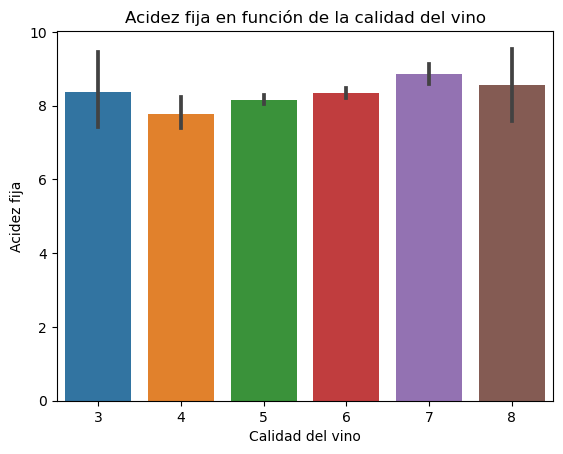

In [6]:
# 1. Acidez fija contra calidad del vino

sns.barplot(x='quality', y = 'fixedAcidity',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Acidez fija")

plt.title("Acidez fija en función de la calidad del vino")
plt.show()


En este gráfica se puede ver que encima de cada una de las barras hay un linea gris. Estas lineas son llamadas *barras de error, o 'error bars'.* 

Estas representan la variabilidad o dispersión de los valores. Entre más pequeña sea la barra, más cercanos son los valores a la media de esa categoría, y visceversa. Esto no quiere decir que siempre busquemos una barra de error pequeña; **las barras de error no son un indicador de la validez de los datos.** Lo que nos comunica esta barra es que tan confiable es la media como valor significativo en nuestros datos, ya que es perfectamente normal tener datos variables.

Esta barras las veremos en todas las demás gráficas.

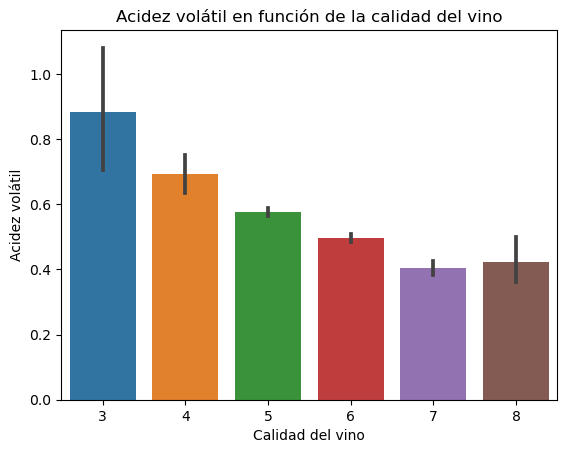

In [7]:
# 2. Acidez volátil contra calidad del vino

sns.barplot(x='quality', y = 'volatileAcidity',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Acidez volátil")

plt.title("Acidez volátil en función de la calidad del vino")
plt.show()

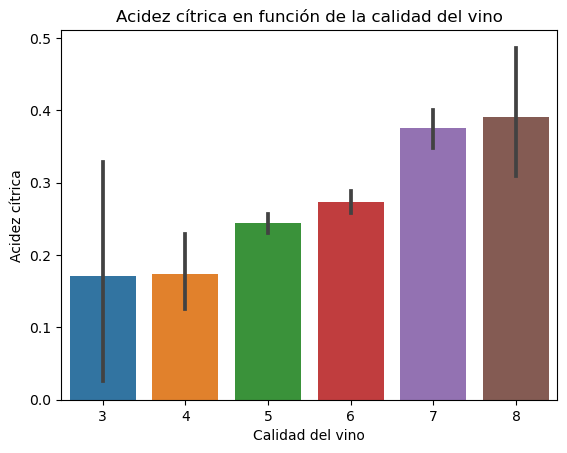

In [8]:
# 3. Acidéz cítrica contra calidad del vino

sns.barplot(x='quality', y = 'citricAcid',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Acidez cítrica")

plt.title("Acidez cítrica en función de la calidad del vino")
plt.show()

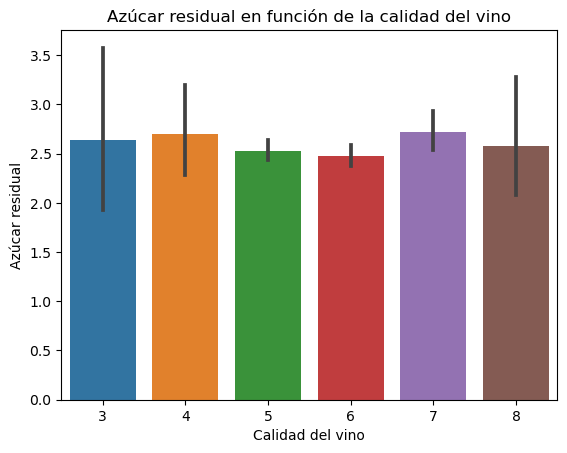

In [9]:
# 4. Azúcar residual contra calidad del vino

sns.barplot(x='quality', y = 'residualSugar',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Azúcar residual")

plt.title("Azúcar residual en función de la calidad del vino")
plt.show()

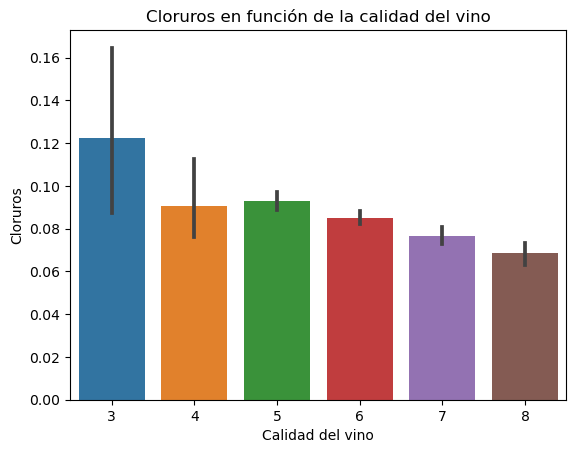

In [10]:
# 5. Cloruros contra calidad del vino

sns.barplot(x='quality', y = 'chlorides',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Cloruros")

plt.title("Cloruros en función de la calidad del vino")
plt.show()

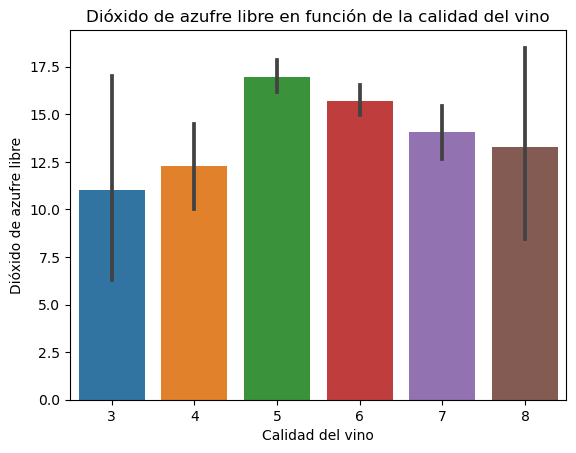

In [11]:
# 6. Dióxido de azufre libre contra calidad del vino

sns.barplot(x='quality', y = 'freeSulfurDioxide',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Dióxido de azufre libre")

plt.title("Dióxido de azufre libre en función de la calidad del vino")
plt.show()

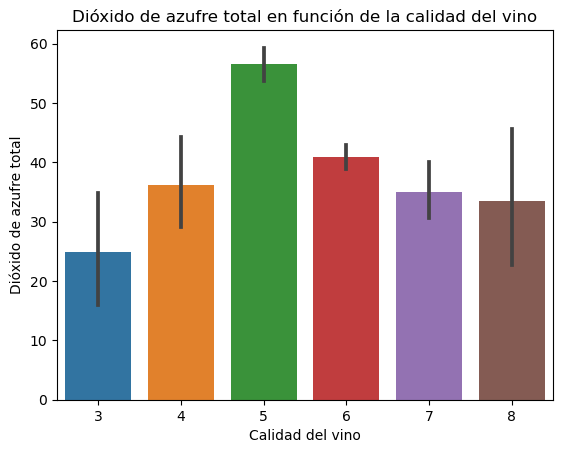

In [12]:
# 7. Dióxido de azufre total contra calidad del vino

sns.barplot(x='quality', y = 'totalSulfurDioxide',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Dióxido de azufre total")

plt.title("Dióxido de azufre total en función de la calidad del vino")
plt.show()


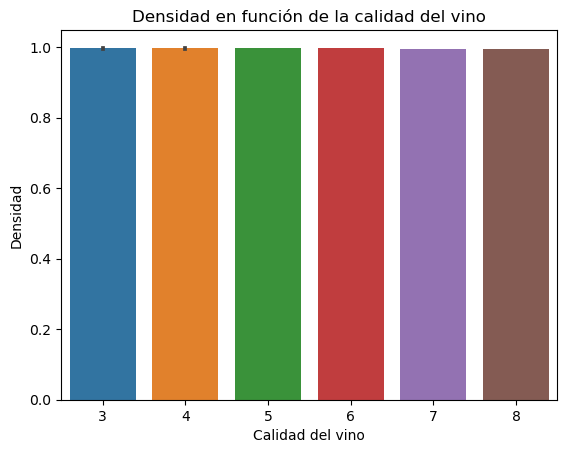

In [13]:
# 8. Densidad contra calidad del vino

sns.barplot(x='quality', y = 'density',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Densidad")

plt.title("Densidad en función de la calidad del vino")
plt.show()

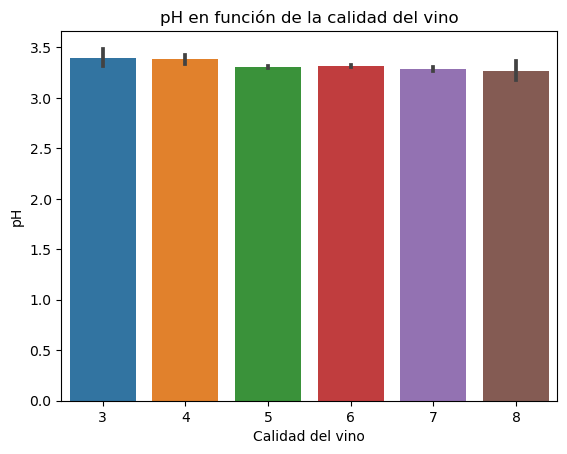

In [14]:
# 9. pH contra calidad del vino

sns.barplot(x='quality', y = 'pH',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("pH")

plt.title("pH en función de la calidad del vino")
plt.show()

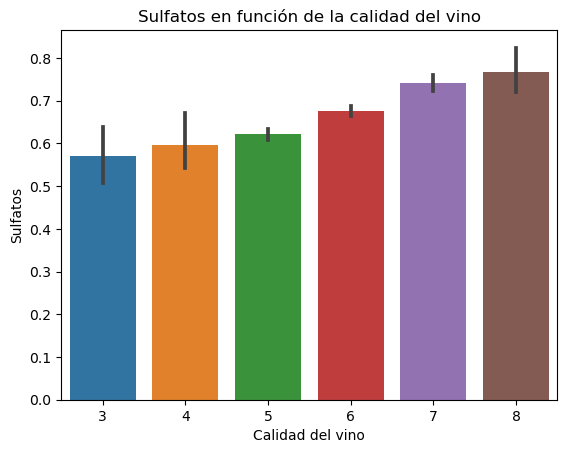

In [15]:
# 10. Sulfatos contra calidad del vino

sns.barplot(x='quality', y = 'sulphates',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Sulfatos")

plt.title("Sulfatos en función de la calidad del vino")
plt.show()


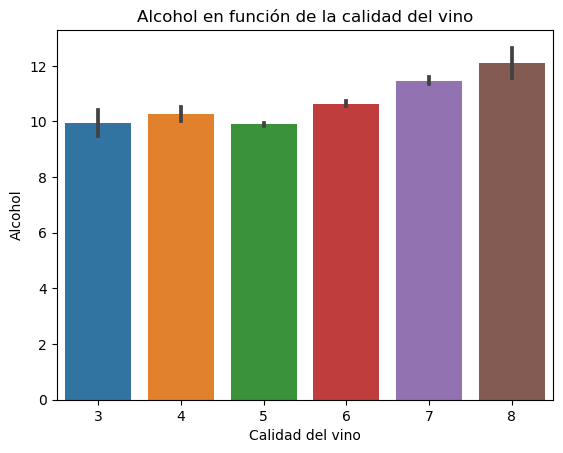

In [16]:
# 11. Alcohol contra calidad del vino

sns.barplot(x='quality', y = 'alcohol',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Alcohol")

plt.title("Alcohol en función de la calidad del vino")
plt.show()

Por último pero menos importante, miramos los valores posibles para la columna de calidad. Esto es clave para los módelos a ser aplicados más adelante.

In [17]:
# 12. Valores para la columna de calidad del vino

wineDF['quality'].unique()


array([5, 6, 7, 4, 8, 3], dtype=int64)

In [18]:
# Numero de valores para número para la cada calidad del vino
wineDF['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

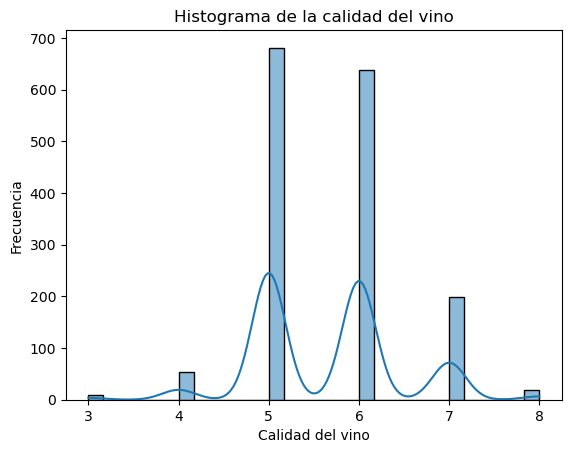

In [19]:
# También presentamos un histrograma de la variable calidad del vino

sns.histplot(data=wineDF, x="quality", kde=True)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Frecuencia")

plt.title("Histograma de la calidad del vino")
plt.show()

Podemos apreciar que la calidad del vino solo tiene valores discretos. 

Más importantemente, con el histograma podemos apreciar que la calidad del vino pareciera tener una **distribución normal**. La mayoría de vinos tienen una calidad "normal" (categorías 5 y 6), y hacia la izquierda y derecha de estos valores las frequencias disminuyen considerablemente.

### Datos nulos y valores duplicados.
A continuación presentamos la cantidad de datos nulos y duplicados.

In [20]:
# Datos nulos del dataframe
print("Cantidad de datos nulos por columna:")
wineDF.isnull().sum()


Cantidad de datos nulos por columna:


fixedAcidity          0
volatileAcidity       0
citricAcid            0
residualSugar         0
chlorides             0
freeSulfurDioxide     0
totalSulfurDioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
dtype: int64

In [21]:
# Datos duplicados del dataframe
print("Cantidad de datos duplicados en el dataframe:", wineDF.duplicated().sum())

Cantidad de datos duplicados en el dataframe: 240


Podemos ver que de los 1599 datos, hay 240 datos repetidos, y un 0 datos nulos, confirmando lo que dijimos más arriba. 

***Nota: Eliminaremos todos los datos duplicados y nulos. Dado que solo hay datos duplicados, borraremos los 240 registros repetidos.***

In [22]:
# Elminamos datos duplicados
wineDF.drop_duplicates(inplace=True)

# E imprimimimos el total de datos duplicados y nulos en todo el dataframe.
print("Cantidad total de datos nulos en el dataframe:", wineDF.isnull().sum().sum())
print("Cantidad de datos duplicados en el dataframe:", wineDF.duplicated().sum())


Cantidad total de datos nulos en el dataframe: 0
Cantidad de datos duplicados en el dataframe: 0


---

## Segunda Parte. Descripción estadística y preparación para los módelos de Machine Learning.

Para hacer la división en binario, se harán dos categorias (etiqueta), bueno y malo. Estas dos clases se definirán entre:
- **['Malo']: 3 - 6.5.** Los vinos cuya calidad estén en este interalo serán categorizados como malos. 
- **['Bueno']: 6.5 - 8.**. De la misma forma, los vinos con calidad en este intervalo serán buenos.

Con estos rangos de valores debemos tener presente la distribución de los valores vista más arriba. La gran mayoría de vinos tienen una calidad de 5 o 6 (Categoria 'Malo'), por lo que es de esperar que muchós más vinos sean etiquetados como 'Malos'.

Con esto en mente, ahora re-escribirimos la columna 'quality', la cual es nuestra columna o variable objetivo. La reescribiremos con los valores dados arriba.

In [23]:
etiquetas = ['Malo', 'Bueno']
intervalos = (2, 6.5, 8)

# Reemplazamos en el dataframe los valores de la columna calidad por aquellos de las etiquetas
wineDF['quality'] = pd.cut(wineDF['quality'], bins=intervalos, labels=etiquetas)


In [24]:
wineDF.head(5)

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Malo
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Malo
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Malo
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Malo
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Malo


In [25]:
# Nuevos valores para la columna calidad del vino
wineDF['quality'].value_counts()

quality
Malo     1175
Bueno     184
Name: count, dtype: int64

In [26]:
# Se crea un objeto de tipo codificador de etiquetas
codificador = LabelEncoder()

Ahora ajustamos y codificamos los valores en forma binaria:
- 1: Malo
- 0: Bueno.

In [27]:
# Se codifica la columna calidad del vino. 0 para malo y 1 para bueno
wineDF['quality'] = codificador.fit_transform(wineDF['quality'])


In [28]:
wineDF.head(5)

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1


In [29]:
wineDF['quality'].value_counts()

quality
1    1175
0     184
Name: count, dtype: int64

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


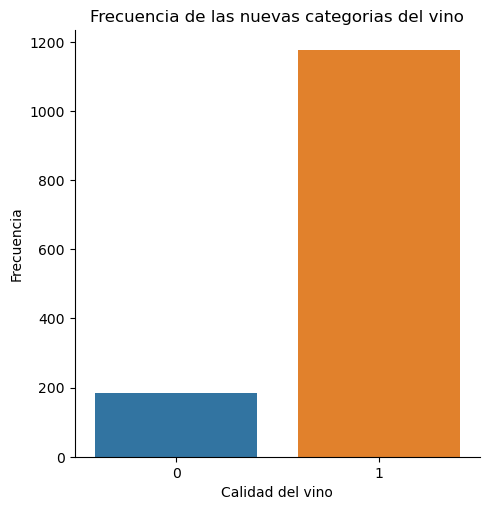

In [30]:
sns.catplot(x="quality", kind="count", data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Frecuencia")

plt.title("Frecuencia de las nuevas categorias del vino")
plt.show()

### Descripción estadística
A continuación deseamos ver los ordenes de magnitud de las variables.

In [31]:
# Con este comando queremos ver el min y max de cada columna para ver los órdenes de magnitud.
wineDF.describe().T

,count,mean,std,min,25%,50%,75%,max
fixedAcidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatileAcidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citricAcid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residualSugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
freeSulfurDioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
totalSulfurDioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


**Observaciones sobre el orden de magnitud de las variables:**

Si bien la mayoría de variables tienen un orden de magnitud similar [0, 10], hay 4 columna en específico que se desvian notoriamente de las demás variables.

1. totalSulfurDioxide: Rango de valores entre [6, 289].
2. freeSulfurDioxide: Rango de valores entre [1, 72].
3. residualSugar: Rango de valore entre [0.9, 15.5].
4. fixedAcidity: Rango de valores entre [4.6, 15.9].

Habría que mirar con más detenemiento si los máximos de las primeras dos columnas son valores atípicos, o si en verdad estos atributos toman frecuentemente estos valores. Sin embargo, es muy probable que estas columnas sesguen los módelos de machine learning debido precisamente a su superior orden de magnitud. El orden de magnitud de la primera columna es más de 25 veces el orden del promedio mencionado. 

Debido a esto, ahora aplicamos el escalamiento estándard (normalización) a todas las columnas cuyos valores esten afuera del rango [0, 1]. Hacemos esta estandarización para garantizar que se le da igual importancia a los datos que tienen diferente dimensionalidad. Si no hacemos esto, es muy probable que se le de más importancia a los datos con mayor dimensionalidad.

También se debe mencionar que este proceso no siempre debe ser aplicado. Suele ser un buen guideline aplicarlos solo en datos con dimensionalidad distinta.


In [32]:
normalizador = StandardScaler()

In [33]:
# Estandarizamos los valores de las columnas para disminuir su escala y que tengan media 0 y desviación estándar 1.
# Columnas (totalSulfurDioxide, freeSulfurDioxide, residualSugar, fixedAcidity, Alcohol)

# Aplicaciones de la normalización entre 0 y 1.
wineDF['totalSulfurDioxide'] = normalizador.fit_transform(wineDF[['totalSulfurDioxide']])
wineDF['freeSulfurDioxide'] = normalizador.fit_transform(wineDF[['freeSulfurDioxide']])
wineDF['residualSugar'] = normalizador.fit_transform(wineDF[['residualSugar']])
wineDF['fixedAcidity'] = normalizador.fit_transform(wineDF[['fixedAcidity']])
wineDF['alcohol'] = normalizador.fit_transform(wineDF[['alcohol']])



In [34]:
# Verificamos los resultados de la transformación con el mismo comando.

wineDF.describe().T

,count,mean,std,min,25%,50%,75%,max
fixedAcidity,1359.0,-6.274108e-16,1.000368,-2.137008,-0.697207,-0.236471,0.512226,4.370894
volatileAcidity,1359.0,5.294776e-01,0.183031,0.120000,0.390000,0.520000,0.640000,1.580000
citricAcid,1359.0,2.723326e-01,0.195537,0.000000,0.090000,0.260000,0.430000,1.000000
residualSugar,1359.0,-1.202537e-16,1.000368,-1.200903,-0.461157,-0.239233,0.056665,9.599383
chlorides,1359.0,8.812362e-02,0.049377,0.012000,0.070000,0.079000,0.091000,0.611000
freeSulfurDioxide,1359.0,-8.365477e-17,1.000368,-1.426094,-0.851570,-0.181291,0.488987,5.372442
totalSulfurDioxide,1359.0,4.182739e-17,1.000368,-1.222457,-0.743367,-0.264277,0.484301,7.251446
density,1359.0,9.967089e-01,0.001869,0.990070,0.995600,0.996700,0.997820,1.003690
pH,1359.0,3.309787e+00,0.155036,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1359.0,6.587049e-01,0.170667,0.330000,0.550000,0.620000,0.730000,2.000000


### Matríz de correlacion
Representa la medida estadística sobre el grado de relación entre dos variables. Por lo general, el valor de correlación e representa en el rango de valores [-1, 1].

- Valores cercanos a -1 significa que la correlación entre variables es inversamente proporcional. Cuando una variable sube, la otra disminuye.
- Valores cercanos a 0 indica que no hay correlación entre las variables.
- Valores cercanos a 1 indica una correlación directamente proporcional. Cuando una variable aumenta, la otra también.

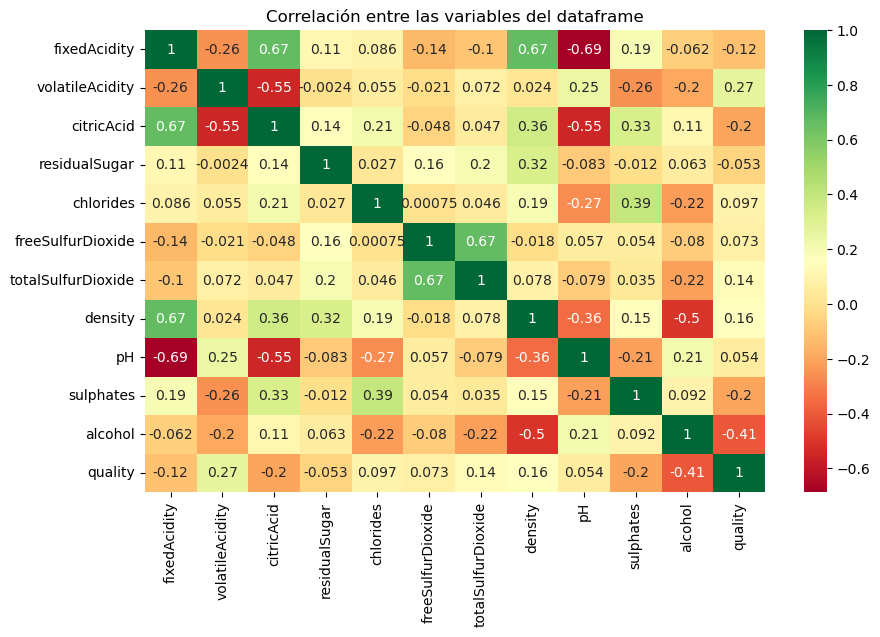

In [35]:
# Usamos seaborn para la creación de un heatmap que nos permita ver la correlación entre las variables del dataframe.

plt.figure(figsize=(10,6))
sns.heatmap(wineDF.corr(), annot=True, cmap="RdYlGn")

plt.title("Correlación entre las variables del dataframe")
plt.show()



**Observaciones sobre la matriz de correlaciones:**

Respecto a nuestra variable objetivo (Quality), podemos ver que no hay ninguna variable que con la cual tenga una correlación fuerte. Descartamos entonces que haya una sola variable que afecte fuertemente la calidad del vino. Sin embargo, resaltamos las variable "Alcohol", que tienen el mayor indice de correlación.

- *Alcohol:* Correlación directamente proporcional de -0.41.

Si bien la correlaciones no se acerca a -1 y 1, de igual manera podemos decir que un buen vino es aquello que tiene baja cantidad de alcohol.

Además, podemos pensar en eliminar aquellas variables que tienen el menor nivel de relación con nuestra variable objetivo. Aquellas que tienen la menor cantidad de correlación.
- pH
- Residual sugar
- Free Sulfur Dioxide

In [36]:
# Borramos los siguientes las 3 columnas mencionadas anteriormente.
wineDF.drop(['pH', 'freeSulfurDioxide', 'residualSugar'], axis=1, inplace=True)

# Verificamos que las columnas se hayan eliminado.
wineDF.columns

Index(['fixedAcidity', 'volatileAcidity', 'citricAcid', 'chlorides',
       'totalSulfurDioxide', 'density', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Particionamiento de los datos entre entrenamiento y prueba.
Para hacer la partición importamos las librerías necesarias.

In [37]:
# Librería para para particionar los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# También se importan las librerías de validación cruzada 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


Y usamos el split estándar de 80-20 para datos de entrenamiento y datos de prueba.

In [38]:
# X = variables independientes
# y = variable dependiente sobre la cual queremos trabajar

X = wineDF.drop('quality', axis=1)
y = wineDF['quality']

# Particionamos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print("Datos de entrenamiento:", X_train.shape)
print("Datos de prueba totales:", X_test.shape)

Datos de entrenamiento: (1087, 8)
Datos de prueba totales: (272, 8)


In [39]:
# Solo a los datos de las variables independientes (prueba y entrenamiento) se les hace la normalización
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.fit_transform(X_test)

## Tercera parte. Aplicación de modelos
Aplicaremos y compararemos 3 modelos:
- Random Forest (RF). 
- Stochastic Gradient Descent (SDG). 
- Support Vector Machine (SVM).

Para los modelos Random RF y SVM los evaluaremos inicialmente con su respectiva matríz de clasificación, y adicionalmente, también usaremos cross validation con el fin de obtener una mejor evaluación.

### Modelo 1. Clasificador Random forest.
Ya teniendo los datos particionados y estandarizados, importamos y aplicamos el modelo random forest.

In [40]:
# Se importan los modelos de clasificación
# Random Forest
from sklearn.ensemble import RandomForestClassifier


In [41]:
# Creación del modelo ranfom forest
modeloRF = RandomForestClassifier(n_estimators=200)

# Ajuste del modelo
modeloRF.fit(X_train, y_train)

# Predicción del modelo
pred_RF = modeloRF.predict(X_test)


#### Métricas de desempeño

Importamos todas las métricas de desempeño para evaluar el modelo.

In [42]:
# Métricas de evaluación del modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

Ahora presentamos las métricas de desempeño del modelo.

##### Reporte de clasificación

In [43]:
print(f"Reporte de Métricas de desempeño del modelo Random Forest:\n{classification_report(y_test, pred_RF)}")

Reporte de Métricas de desempeño del modelo Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.25      0.38        40
           1       0.88      0.99      0.93       232

    accuracy                           0.88       272
   macro avg       0.83      0.62      0.66       272
weighted avg       0.87      0.88      0.85       272



**Accuracy:** 
El accuracy del modelo es 0.87. Este es un buen número, pero tenemos que tener en cuenta que el accuracy es famoso por no *tener en cuenta el desbalance de clases*, como lo es en nuestro caso. La clase de vinos malos tiene MUCHAS más muestras que la otra clase. Como veremos, todos los modelos tienen un accuracy elevada, debido a que pueden predecir generalmente bien un vino malo. Sin embargo, todas las métricas suelen ser muy pobres para la clase 0, o vinos buenos.

**Precisión:**
Teniendo en cuenta la observación sobre el accuracy, podemos ver aún así que este modelo tiene una muy buena precision.Es decir, tiene un ratio bajo de falsos positivos en la clase.

**Recall:**
En contraposición a la precisión, el recall tiene un pésimo puntaje de solo 0.25. Si bien el modelo no tiene tantos falsos positivos, falla mucho en la detección de verdaderos positivos de los vinos buenos.

**Puntuación F1:**
Siendo el f1 el promedio entre las 2 métricas anteriores, la métrica se promedia a un 0.38.

##### Matríz de confusión

Matriz de confusión:
[[ 10  30]
 [  3 229]]


Text(50.722222222222214, 0.5, 'Valores reales')

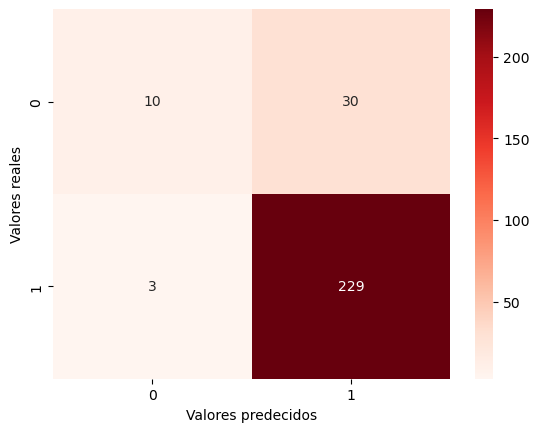

In [44]:
# Mostramos gráficamente la matriz de confusión

matriz_confusion = confusion_matrix(y_test, pred_RF)

sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Reds")

# Imprimimo los valores de la matriz de confusión
print("Matriz de confusión:")
print(matriz_confusion)

# Cambiamos los nombres de los ejes
plt.xlabel("Valores predecidos")
plt.ylabel("Valores reales")



La casilla superior izquierda (27) representa el número de vinos de "buena calidad" (clase 0) que el modelo clasificó correctamente como de "buena calidad". Esto se conoce como Verdaderos Positivos (TP).

La casilla superior derecha (21) representa el número de vinos de "buena calidad" (clase 0) que el modelo clasificó incorrectamente como de "mala calidad". Esto se conoce como Falsos Negativos (FN).

La casilla inferior izquierda (5) representa el número de vinos de "mala calidad" (clase 1) clasificados erróneamente como de "buena calidad" por el modelo. Esto se conoce como falsos positivos (FP).

La casilla inferior derecha (267) representa el número de vinos de "mala calidad" (clase 1) clasificados correctamente como de "mala calidad" por el modelo. Esto también se conoce como Verdaderos Positivos (TP).

Podemos ver claramente que el modelo clásifica correctamente la gran mayoría de vinos malos. Esto, de nuevo probablemente se deba al desbalance de datos.

### Modelo 2. Stochastic gradient Descent (SGD).

In [45]:
# Importamos la librería del modelo Stochastic Gradient Descent (SGD)
from sklearn.linear_model import SGDClassifier

In [46]:
# Creamos el modelo y hacemos predicciones con el mismo
modeloSGD = SGDClassifier(penalty=None)

# Ajuste del modelo
modeloSGD.fit(X_train, y_train)

# Predicción del modelo
pred_SGD = modeloSGD.predict(X_test)

In [47]:
# Métricas de evaluación del modelo
print(f"Reporte de Métricas de desempeño del modelo SGD:\n{classification_report(y_test, pred_SGD)}")

Reporte de Métricas de desempeño del modelo SGD:
              precision    recall  f1-score   support

           0       0.40      0.05      0.09        40
           1       0.86      0.99      0.92       232

    accuracy                           0.85       272
   macro avg       0.63      0.52      0.50       272
weighted avg       0.79      0.85      0.80       272



En contraposición al RF, este modelo exhibe métricas aún peores para la clase de vinos malos, pero muy buenas para vinos buenos.
- Se podría decir que el modelo se sobreajusto a los datos de vinos buenos.


### Modelo 3. Support Vector Machine (SVM)

In [48]:
# Importamos la libreria para el modelo Support Vector Machine (SVM)
from sklearn.svm import SVC

In [49]:
# Creamos el modelo svc base y hacemos predicciones con el
modeloSVC0 = SVC()

# Ajuste del modelo
modeloSVC0.fit(X_train, y_train)

# Predicción del modelo
pred_SVC0 = modeloSVC0.predict(X_test)


In [50]:
# Métricas de evaluación del modelo
print(f"Reporte de Métricas de desempeño del modelo SVC:\n{classification_report(y_test, pred_SVC0)}")

Reporte de Métricas de desempeño del modelo SVC:
              precision    recall  f1-score   support

           0       0.75      0.23      0.35        40
           1       0.88      0.99      0.93       232

    accuracy                           0.88       272
   macro avg       0.82      0.61      0.64       272
weighted avg       0.86      0.88      0.84       272



In [51]:
# Modelo con busca de mejores hiperparámetros.
modeloSVC = SVC()

parametros = {
    'C' :[0.1, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.0]  # Regularización con valores > 0.
    ,'kernel' :['linear', 'rbf'] # Kernel lineal y radial
    ,'gamma':[1.0, 0.1, 0.8, 0.9,1.1, 1.2, 1.3, 1.4] # Coeficiente del kernel para los kernels rbf.
    
}

gridCV = GridSearchCV(
    modeloSVC, scoring='accuracy', cv=10, 
    param_grid = parametros
)

# Ajuste del modelo
gridCV.fit(X_train, y_train)

gridCV.fit(X_train, y_train)

gridCV.best_params_

{'C': 1.0, 'gamma': 1.2, 'kernel': 'rbf'}

In [52]:
# Predicción del modelo
pred_GridCV = gridCV.predict(X_test)

In [53]:
# Métricas de evaluación del modelo
print(f"Reporte de Métricas de desempeño del modelo SVM:\n{classification_report(y_test, pred_GridCV)}")

Reporte de Métricas de desempeño del modelo SVM:
              precision    recall  f1-score   support

           0       0.60      0.15      0.24        40
           1       0.87      0.98      0.92       232

    accuracy                           0.86       272
   macro avg       0.74      0.57      0.58       272
weighted avg       0.83      0.86      0.82       272



El modelo ajustado de SVC tiene un desempeño mucho más balanceado que el SGD. Sin embargo, sigue exponiendo el mismo comportamiento de sobreajuste a vinos malos, y muy mal desempeño a vinos buenos.

### Evaluación por cross validation.

In [ ]:
# Aplicación de cross validation para el SGD
sgd_cv = cross_val_score(modeloSGD, X_train, y_train, scoring='accuracy')
sgd_cv.mean()

0.8436223734832791

Podemos ver que de hecho, el cross validation da un accuracy peor que con la matriz simple. Indicativo de que el modelo tiene un desempeño peor del que esperabamos. 

## Cuarta parte. Conclusiones.

In [ ]:
# Reportes de métricas de desempaño de los 3 modelos
print(f"\nReporte de Métricas de desempeño del modelo Random Forest:\n{classification_report(y_test, pred_RF)}")
print(f"\nReporte de Métricas de desempeño del modelo SGD:\n{classification_report(y_test, pred_SGD)}")
print(f"\nReporte de Métricas de desempeño del modelo SVM:\n{classification_report(y_test, pred_SVC0)}")


Reporte de Métricas de desempeño del modelo Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.25      0.38        40
           1       0.88      0.99      0.93       232

    accuracy                           0.88       272
   macro avg       0.83      0.62      0.66       272
weighted avg       0.87      0.88      0.85       272


Reporte de Métricas de desempeño del modelo SGD:
              precision    recall  f1-score   support

           0       0.40      0.05      0.09        40
           1       0.86      0.99      0.92       232

    accuracy                           0.85       272
   macro avg       0.63      0.52      0.50       272
weighted avg       0.79      0.85      0.80       272


Reporte de Métricas de desempeño del modelo SVM:
              precision    recall  f1-score   support

           0       0.75      0.23      0.35        40
           1       0.88      0.99      0.93       232

    accuracy          

En general, podemos destacar 3 elementos comúnes de los resultados obtenidos:
1. Claro desbalance de datos.
2. Mal desempeño con vinos buenos.
3. Pocos datos para que el modelo pueda aprender a predecir bien vinos buenos.